In [1]:
import pandas as pd


In [2]:
dfmortality=pd.read_csv("/Users/anuragsneh/Desktop/uiuc_msim/health_Care/mortality/Mortality Data.csv")

In [3]:
print(dfmortality.columns)
print(dfmortality.head())
len_country_m=len(dfmortality["CountryName"].value_counts())
print(len_country_m)

Index(['CountryName', 'MortalityYear', 'Gender', 'AgeGroupCode', 'ICD10',
       'Deaths'],
      dtype='object')
  CountryName  MortalityYear Gender  AgeGroupCode ICD10  Deaths
0     Brazil            2017   Male            21  I479       1
1     Brazil            2017   Male            21  C925       1
2     Brazil            2017   Male            21  I451       1
3     Brazil            2017   Male            21  D292       1
4     Brazil            2017   Male            21  L519       1
48


In [4]:

df = dfmortality[dfmortality.ICD10.str.contains('J')]  #.reset_index()
print(df.head())
df.reset_index(inplace=True)
print(df)

    CountryName  MortalityYear Gender  AgeGroupCode ICD10  Deaths
98      Brazil            2017   Male            21  J128       1
103     Brazil            2017   Male            21  J65        1
106     Brazil            2017   Male            21  J840       1
107     Brazil            2017   Male            21  J948       1
132     Brazil            2017   Male            21  J458       1
          index CountryName  MortalityYear  Gender  AgeGroupCode ICD10  Deaths
0            98     Brazil            2017    Male            21  J128       1
1           103     Brazil            2017    Male            21  J65        1
2           106     Brazil            2017    Male            21  J840       1
3           107     Brazil            2017    Male            21  J948       1
4           132     Brazil            2017    Male            21  J458       1
5           135     Brazil            2017    Male            21  J390       1
6           142     Brazil            2017    Male 

In [5]:
df_group=df.groupby("CountryName").sum()#.sort_values(ascending=False)
country=df_group.index
df_group["Country Name"]=country

print(type(country))
print(df_group.head())
df_group.head()
df_group.rename(columns={"CoutryName":"Country Name"},inplace=True)
#df_group.(inplace=True)
df_group.reset_index(inplace=True)
print(df_group.head())
del df_group["CountryName"]
print(df_group.head())
df_group["Country Name"]=df_group["Country Name"].str.strip()
print("fbhjd")
print(df_group)
print(df_group[df_group["Country Name"]=="Brazil"])
print(df_group.dtypes)
df_group.sort_values("Deaths",inplace=True,ascending=False)
df_group=df_group.reset_index()
print( df_group)

<class 'pandas.core.indexes.base.Index'>
                           index  MortalityYear  AgeGroupCode  Deaths  \
CountryName                                                             
Anguilla               102802980          78341           888      39   
Antigua and Barbuda   1598132369        1049641         11231     618   
Argentina            97714025281       55867531        542432  942190   
Aruba                 1195115748         831706          9867     508   
Bahamas               3257115003        1912898         19309    1286   

                            Country Name  
CountryName                               
Anguilla                        Anguilla  
Antigua and Barbuda  Antigua and Barbuda  
Argentina                      Argentina  
Aruba                              Aruba  
Bahamas                          Bahamas  
           CountryName        index  MortalityYear  AgeGroupCode  Deaths  \
0             Anguilla    102802980          78341           888      

In [6]:
df_pop=pd.read_csv("/Users/anuragsneh/Desktop/uiuc_msim/health_Care/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv",skiprows=4)

In [7]:
df_pop.head()
df_pop.columns
del df_pop["Unnamed: 64"]

In [8]:
print(df_pop.head())
len(df_pop["Country Name"])

  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996973.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5454933.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2010  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101669.0   
1  9169410.0  9351441.0  9543205.0  9744781.0  9956320.0  ...  29185507.0   
2  5531472.0  5608539.0  5679458.0  5735044.0  5770570.0  ...  23356246.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2913021.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     84449.0   

         2011        2012        2013        2014        2015        2016  \
0  

264

In [9]:
import numpy as np
df_pop["Country Name"].value_counts()
#np.unique(df_pop["Country Name"])

United Arab Emirates                            1
Bangladesh                                      1
Turkmenistan                                    1
IDA blend                                       1
Samoa                                           1
Euro area                                       1
Norway                                          1
Bhutan                                          1
Nicaragua                                       1
Congo, Dem. Rep.                                1
Equatorial Guinea                               1
Least developed countries: UN classification    1
Barbados                                        1
Late-demographic dividend                       1
Argentina                                       1
Nauru                                           1
Guinea                                          1
India                                           1
Faroe Islands                                   1
Low & middle income                             1


In [10]:
df_pop["Country Name"]=df_pop["Country Name"].str.strip()
print("Able to captured")

cap=df_pop[df_pop["Country Name"].isin(df_group["Country Name"])]
print(len(cap["Country Name"]))
i=df_pop["Country Name"].isin(df_group["Country Name"])
print(len(~i))
print("Not able to captured")
print(df_pop[~i]["Country Name"])
print(len(df_pop[~i]["Country Name"]))



Able to captured
33
264
Not able to captured
1                                            Afghanistan
2                                                 Angola
3                                                Albania
4                                                Andorra
5                                             Arab World
6                                   United Arab Emirates
8                                                Armenia
9                                         American Samoa
11                                             Australia
12                                               Austria
13                                            Azerbaijan
14                                               Burundi
15                                               Belgium
16                                                 Benin
17                                          Burkina Faso
18                                            Bangladesh
19                                         

In [11]:
#Before Joining ensuring wether all the country name in the mortality dataset exactly matches the population dataset
df_pop[df_pop["Country Name"].str.contains("Guadeloupe")]
df_pop[df_pop["Country Name"].str.contains("Cay",case=False)]
df_pop.loc[50,"Country Name"]="CaymanIslands"
df_pop[df_pop["Country Name"].str.contains("salva",case=False)]
df_pop.loc[209,"Country Name"]="El Salvador"
df_pop[df_pop["Country Name"].str.contains("lucia",case=False)]
df_pop.loc[131,"Country Name"]="Saint Lucia"
df_pop[df_pop["Country Name"].str.contains("vincent",case=False)]
df_pop.loc[251,"Country Name"]="Saint Vincent and the Grenadines"
df_pop[df_pop["Country Name"].str.contains("united",case=False)]
df_pop.loc[249,"Country Name"]="United States of America"
df_pop[df_pop["Country Name"].str.contains("venez",case=False)]
df_pop.loc[252,"Country Name"]="Venezuela"
df_pop[df_pop["Country Name"].str.contains("virgin",case=False)]
df_pop.loc[254,"Country Name"]="Virgin Islands (US)"
df_pop[df_pop["Country Name"].str.contains("virgin",case=False)]
df_pop.loc[253,"Country Name"]="VirginIslands,British"

df_join=pd.merge(df_group,df_pop,how="inner",on="Country Name",suffixes=("l","r"))

In [12]:
df_join.columns
len(df_join["Country Name"].value_counts())
df_join.sort_values("Deaths",inplace=True)

In [13]:
df_join["Country_Name+population'18"]=df_join["Country Name"].map(str)+"("+df_join["2018"].map(str)+")"
df_join["mpc_2018"]=df_join["Deaths"]/df_join["2018"]
df_join["mpc_2017"]=df_join["Deaths"]/df_join["2017"]
df_join["mpc_2016"]=df_join["Deaths"]/df_join["2016"]
df_join["mpc_2015"]=df_join["Deaths"]/df_join["2015"]
df_join.plot.bar(x="Country_Name+population'18",y=["mpc_2018","mpc_2017","mpc_2016","mpc_2015"],figsize=(20,10))

The table is sorted by the death count in the ascending order. As we go from left to right the death count increases.
In the above table, though the death count in the USA is maximum but the mortality per capita is better than alot of countries whose absolute death count figure is lower. Hence absolute death reported should not be considered a reliable parameter.


In [44]:
df_join.sort_values("mpc_2018",inplace=True)
list_n=df_join.tail(5)["Country Name"]


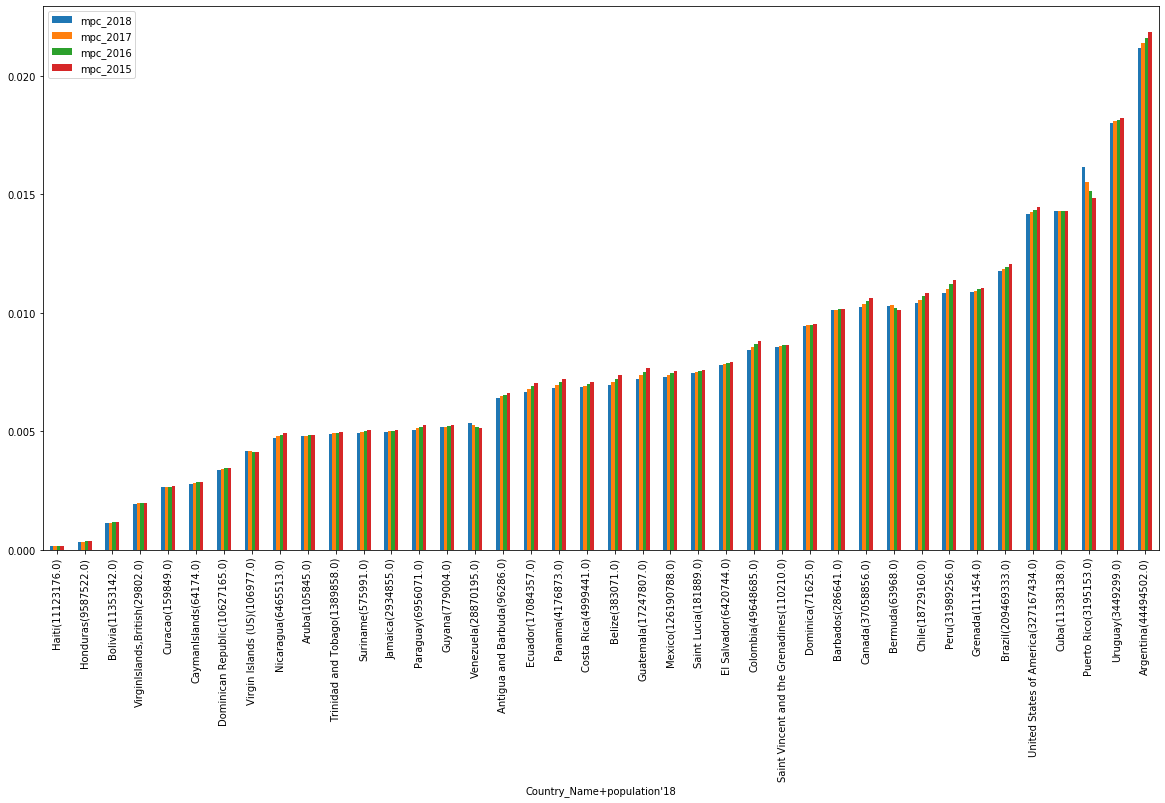

In [15]:
df_join.plot.bar(x="Country_Name+population'18",y=["mpc_2018","mpc_2017","mpc_2016","mpc_2015"],figsize=(20,10))

In the above bar plot, as the population increases, the mpc also increases. Thereby population and mpc have a linear relationship.

As per mpc figures, Argentina needs immediate attention in combating mortality due to respiratory diseases. Now narrowing our focus just on Argentina.

In [16]:
df.rename(columns={"CountryName":"Country Name"},inplace=True)
print(df.columns)
df_argentina=df[df["Country Name"]=="Argentina"]

Index(['index', 'Country Name', 'MortalityYear', 'Gender', 'AgeGroupCode',
       'ICD10', 'Deaths'],
      dtype='object')


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
df_argentina.head()

,index,Country Name,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths
1621,36625,Argentina,2017,Male,23,J129,1
1622,36634,Argentina,2017,Male,23,J101,1
1623,36653,Argentina,2017,Male,23,J961,1
1624,36675,Argentina,2017,Male,23,J111,1
1625,36682,Argentina,2017,Male,23,J399,1


            index  MortalityYear  AgeGroupCode  Deaths ICD10
ICD10                                                       
J00       9136869          10054            97       5  J00 
J013      6055606           1997            22       1  J013
J014      3769401           2012            18       1  J014
J019     11728712           3997            34       2  J019
J020      7483660           4011            32       2  J020
J029     49134705          24059           179      12  J029
J039     32313364          20066           146      10  J039
J040     73215040          42119           186      21  J040
J041      6704877           4009            38       2  J041
J042     38991083          18036            87       9  J042
J050     29259551          14022            97       7  J050
J051     31503658          16027           123       8  J051
J060      3898168           4026            51       2  J060
J068     21662298          10033            70       5  J068
J069    215100086       

Text(0.5, 1.0, 'Diseases that are rising in Argentina')

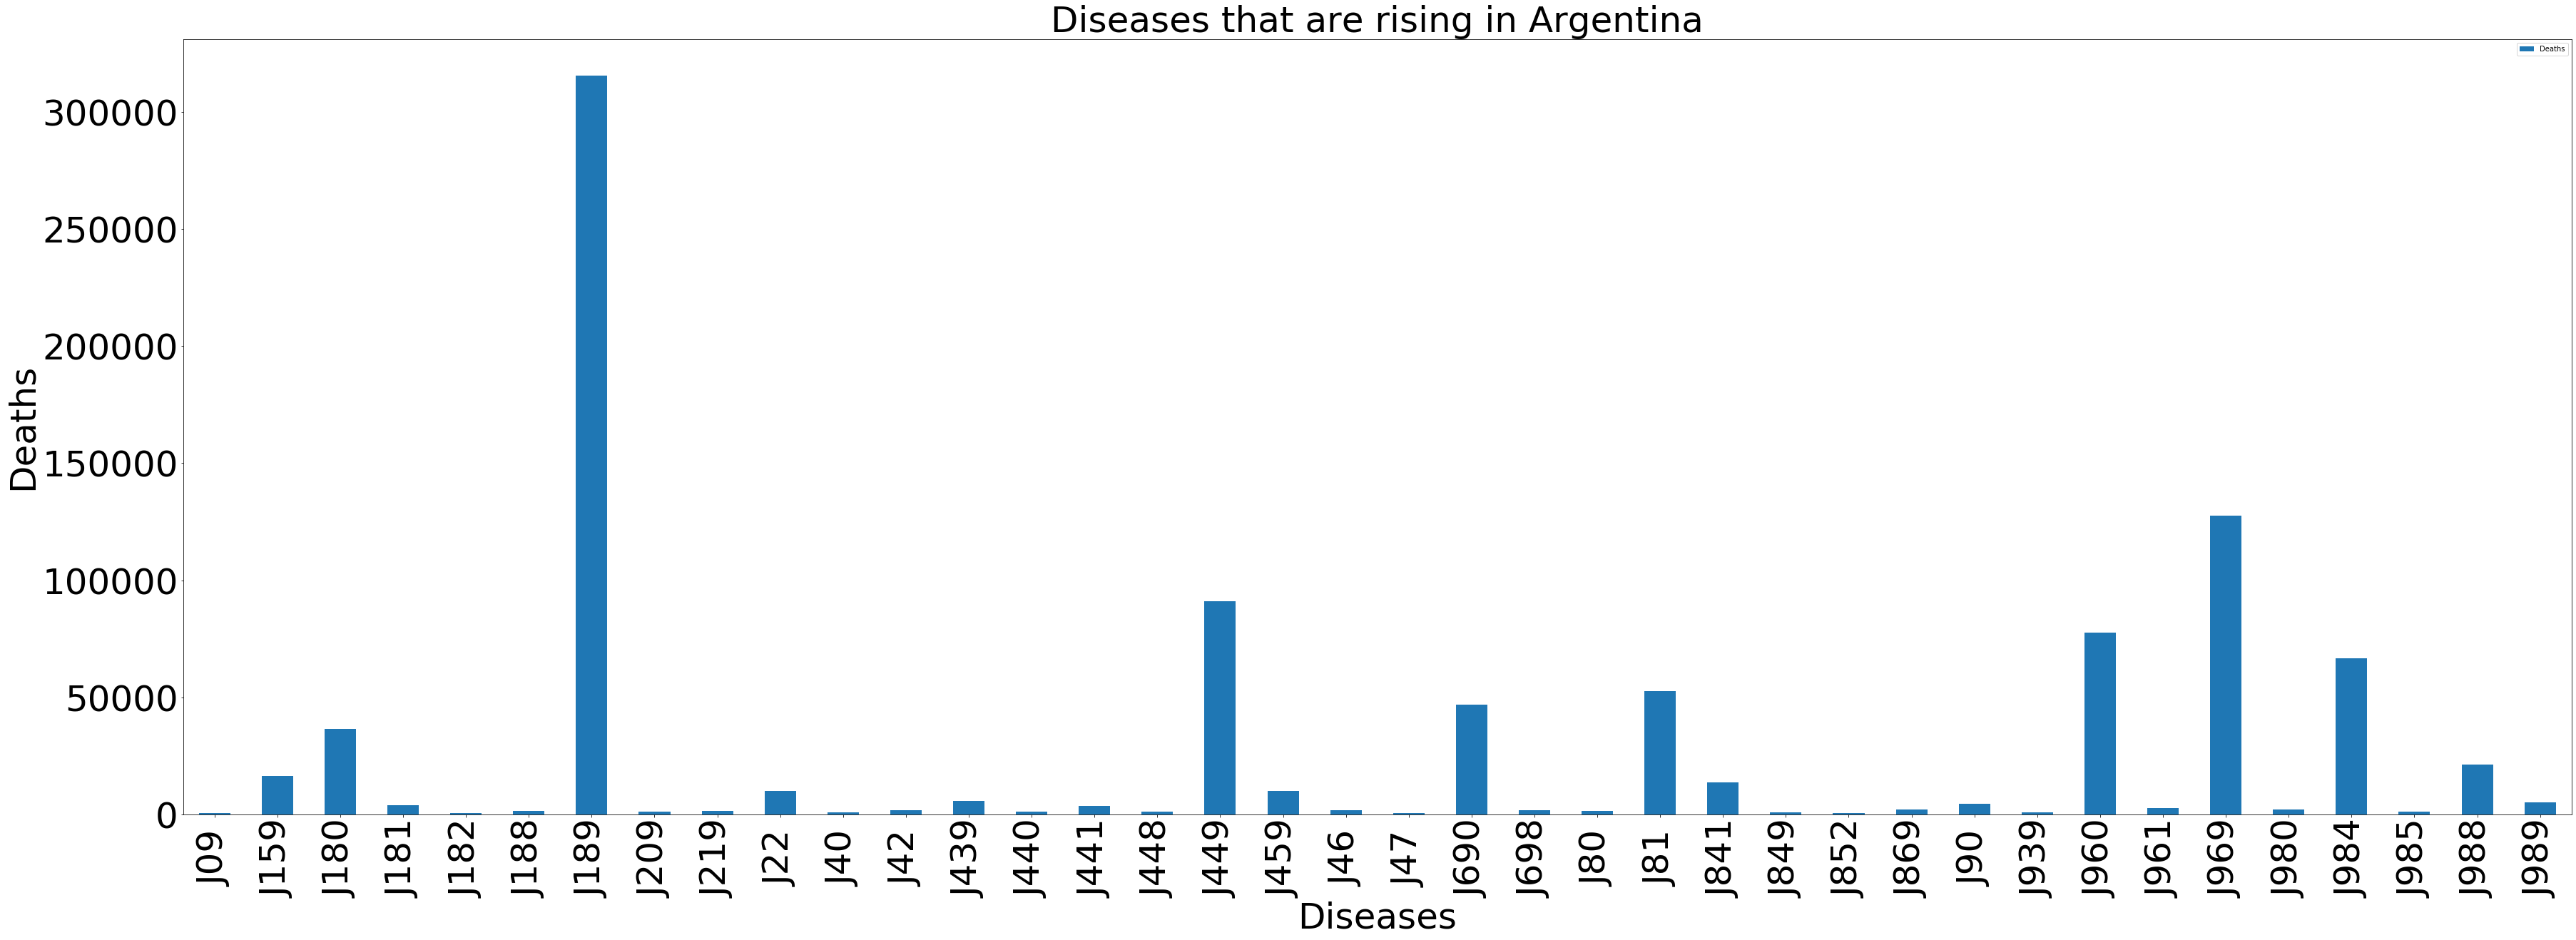

In [31]:
#Finding the no. of deaths grouped by the distinct diseases

df_argentina_disease=df_argentina.groupby("ICD10").sum()
df_argentina_disease["ICD10"]=df_argentina_disease.index
print(df_argentina_disease)
df_argentina_disease["ICD10"]=df_argentina_disease["Deaths"].astype(int)
df_argentina_disease=df_argentina_disease[df_argentina_disease["ICD10"]>500]
print(len(df_argentina_disease))
#print(x=df_argentina_disease.index,y=df_argentina_disease)
df_argentina_disease["index1"]=df_argentina_disease.index
p=df_argentina_disease.plot.bar(x="index1",y="Deaths",figsize=(60,20),fontsize=50,title="Diseases that are rising in Argentina")
p.set_xlabel("Diseases",fontsize=50)
p.set_ylabel("Deaths",fontsize=50)
p.set_title("Diseases that are rising in Argentina",fontsize=50)
#,xlabel="Diseases",y="Death Count"

Looking into Uruguay and what disease are on rise there

            index  MortalityYear  AgeGroupCode  Deaths ICD10
ICD10                                                       
J00      16873808          10031           116       5  J00 
J029     15964526           6002            59       3  J029
J040     32192679          22064           121      11  J040
J051      6774714           4018            38       3  J051
J069     98601601          76391           753      41  J069
J09      95947896          82475           635      55  J09 
J108     15079329           6030            71       3  J108
J110     23511321          12037           138       6  J110
J111    188549012         114395          1342      71  J111
J118      5938157           1998            25       1  J118
J120     47661454          22047            58      14  J120
J121      7525770           4012            11       2  J121
J129    309138704         142248          1273      80  J129
J13     389625834         265181          2759     160  J13 
J14       1025085       

Text(0.5, 1.0, 'Diseases that are rising in Uruguay')

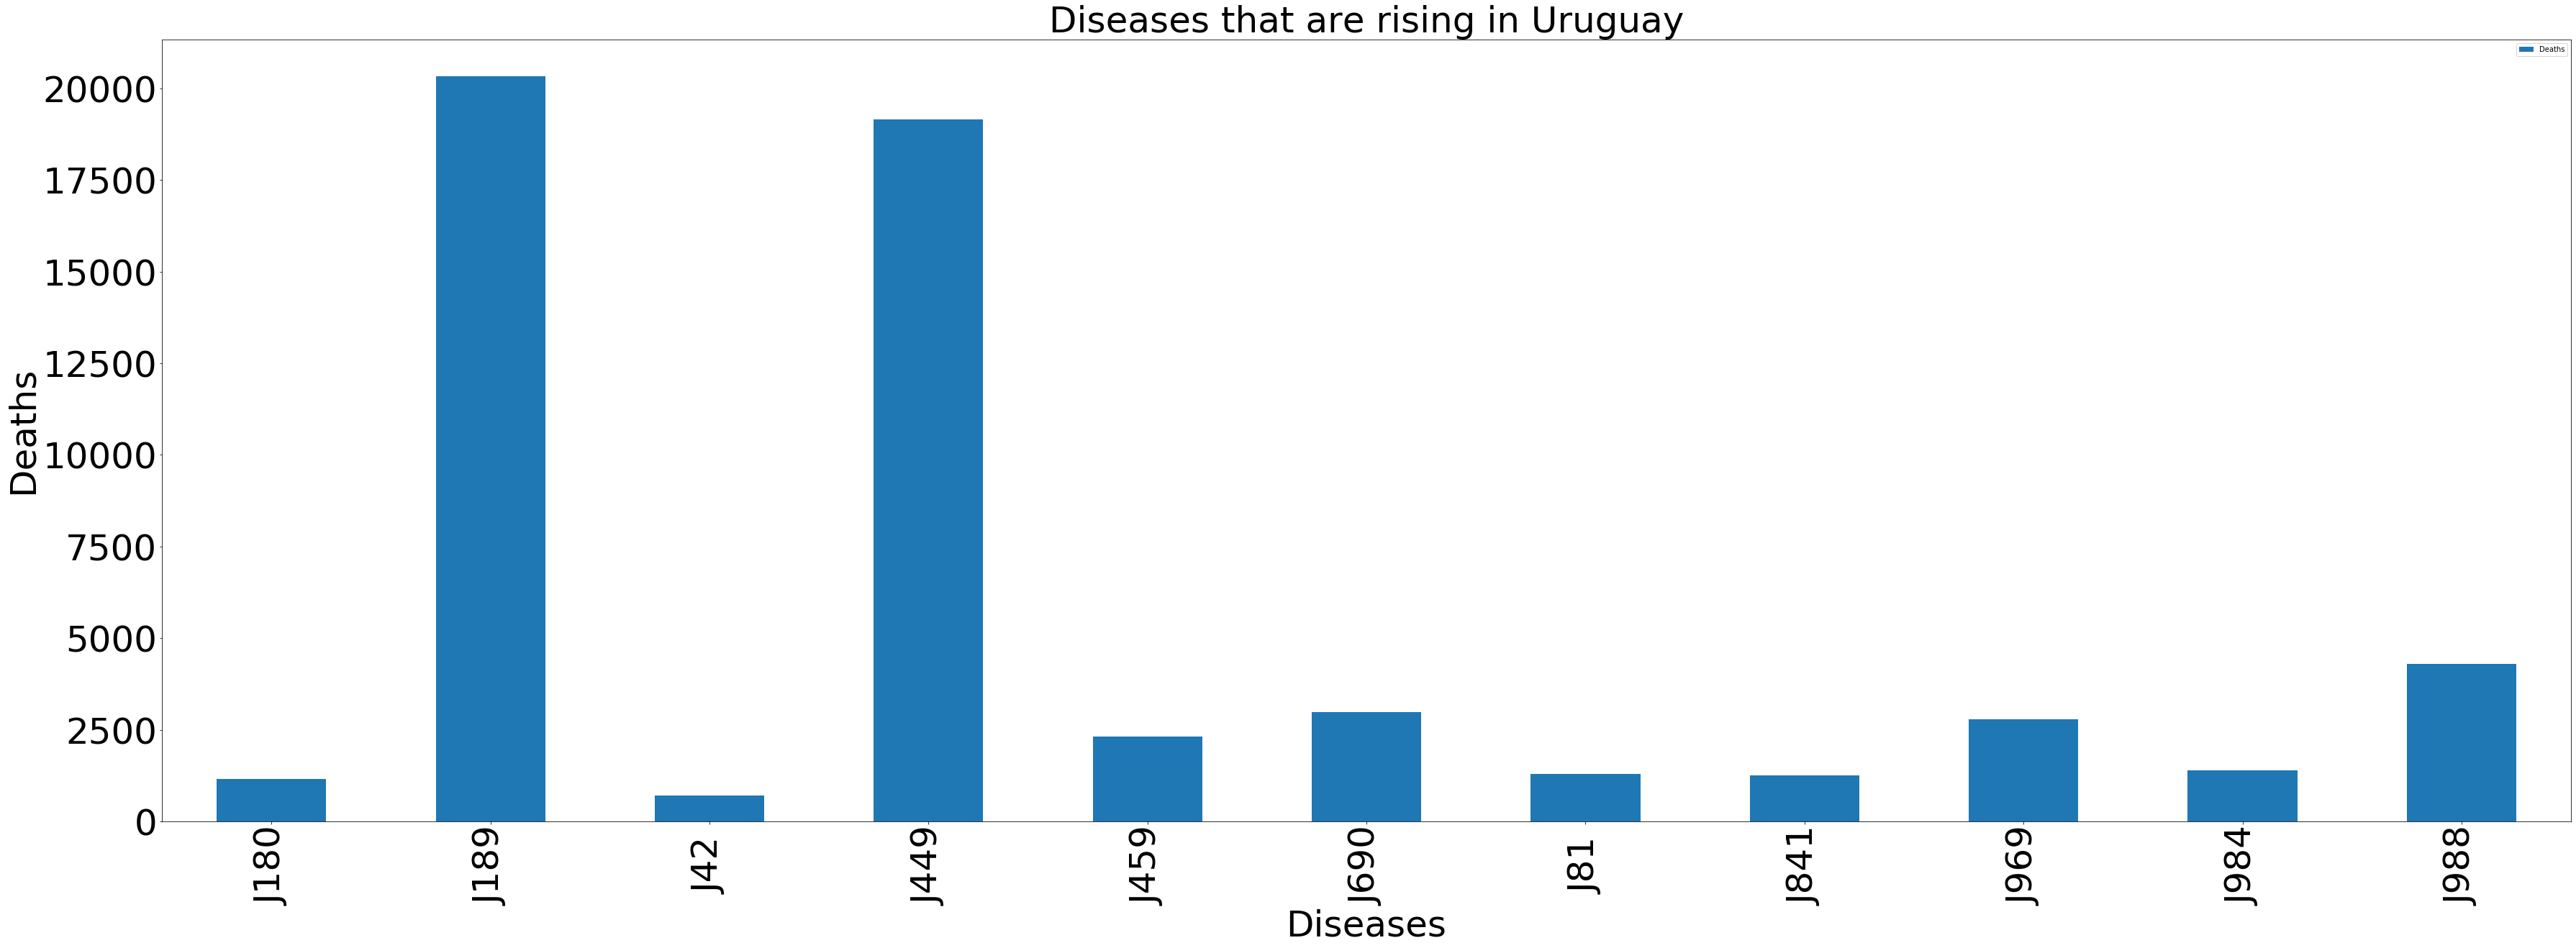

In [33]:
df_Uruguay=df[df["Country Name"]=="Uruguay"]
df_Uruguay_disease=df_Uruguay.groupby("ICD10").sum()
df_Uruguay_disease["ICD10"]=df_Uruguay_disease.index
print(df_Uruguay_disease)
df_Uruguay_disease["ICD10"]=df_Uruguay_disease["Deaths"].astype(int)
df_Uruguay_disease=df_Uruguay_disease[df_Uruguay_disease["ICD10"]>500]
print(len(df_Uruguay_disease))
#print(x=df_argentina_disease.index,y=df_argentina_disease)
df_Uruguay_disease["index1"]=df_Uruguay_disease.index
p=df_Uruguay_disease.plot.bar(x="index1",y="Deaths",figsize=(60,20),fontsize=50,title="Diseases that are rising in Uruguay")
p.set_xlabel("Diseases",fontsize=50)
p.set_ylabel("Deaths",fontsize=50)
p.set_title("Diseases that are rising in Uruguay",fontsize=50)


In [48]:
list_n=list(list_n)

for i in   

['United States of America', 'Cuba', 'Puerto Rico', 'Uruguay', 'Argentina']
